In [179]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import tifffile as tiff
from skimage import data, filters, measure, color 
import matplotlib.patches as mpatches
from skimage.data import camera
import pandas as pd

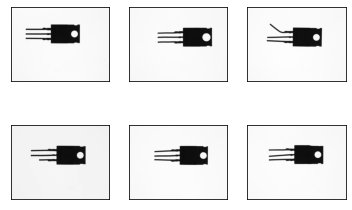

In [272]:
img_path = "C:/Users/ysahu/Downloads/ImagesDeTravail/"
imgs = [ tiff.imread(img_path + str(i) + "imagetest.tif") for i in range(1, 7)]
#plt.imshow(img)

for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(imgs[i],'gray',vmin=0,vmax=255)
 plt.xticks([]),plt.yticks([])


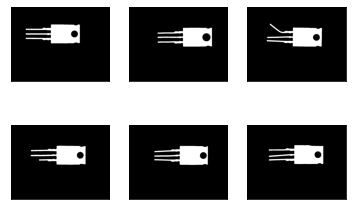

In [283]:
threshds_inv = [cv.threshold(imgs[i],127,255,cv.THRESH_BINARY_INV) for i in range(6)]
threshds = [cv.threshold(imgs[i],127,255,cv.THRESH_BINARY) for i in range(6)]

for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(threshds_inv[i][1],'gray',vmin=0,vmax=255)
 plt.xticks([]),plt.yticks([])

In [274]:
#value a was calculated from the etalon(first) transistor
a = 0.052142857142857144

bboxes_tr = []
legs_inds = []
L1 = []
L2 = []
L3 = []
H1 = []
H2 = []
D = []
P = []


Image num  1
1 Regions detected
L1 = 29.2 H1 = 10.272142857142857

Image num  2
1 Regions detected
L1 = 29.356428571428573 H1 = 10.22

Image num  3
1 Regions detected
L1 = 29.825714285714287 H1 = 12.41

Image num  4
1 Regions detected
L1 = 29.61714285714286 H1 = 10.272142857142857

Image num  5
1 Regions detected
L1 = 28.88714285714286 H1 = 10.272142857142857

Image num  6
1 Regions detected
L1 = 29.460714285714285 H1 = 10.22


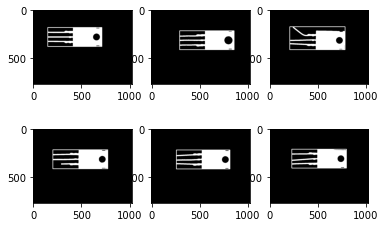

In [275]:
for i in range(6):
    print("\nImage num ", i+1)
    thresh_inv = threshds_inv[i][1]
    regions = measure.regionprops(thresh_inv)
    print(len(regions), "Regions detected")
    props = regions[0]
    
    minr_tr, minc_tr, maxr_tr, maxc_tr = props.bbox
    bboxes_tr.append((minr_tr, minc_tr, maxr_tr, maxc_tr))
    
    cv.rectangle(thresh_inv, (minc_tr, minr_tr), (maxc_tr, maxr_tr), color=(255,0,0), thickness=5)
    plt.subplot(2,3,i+1),plt.imshow(thresh_inv,'gray',vmin=0,vmax=255)
    
    w = maxc_tr - minc_tr
    h = maxr_tr - minr_tr

    real_w = w*a
    real_h = h*a

    print("L1 =", real_w, "H1 =", real_h)
    
    L1.append(real_w)    
    H1.append(real_h)
    

In [276]:
print(L1)
print(H1)

[29.2, 29.356428571428573, 29.825714285714287, 29.61714285714286, 28.88714285714286, 29.460714285714285]
[10.272142857142857, 10.22, 12.41, 10.272142857142857, 10.272142857142857, 10.22]



Image num  1
2 Regions detected
D = 3.7021428571428574
H2 = 5.136071428571428


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Image num  2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 Regions detected
D = 4.38
H2 = 5.031785714285714

Image num  3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 Regions detected
D = 3.65
H2 = 5.005714285714285

Image num  4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 Regions detected
D = 3.597857142857143
H2 = 5.11

Image num  5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 Regions detected
D = 3.65
H2 = 5.057857142857143

Image num  6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 Regions detected
D = 3.597857142857143
H2 = 5.083928571428571


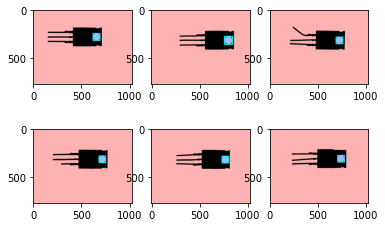

In [277]:
for i in range(6):
    print("\nImage num ", i+1)
    thresh = threshds[i][1]
    label_image = measure.label(thresh)
    image_label_overlay = color.label2rgb(label_image, image=thresh, bg_label=0)

    regions = measure.regionprops(label_image)
    print(len(regions), "Regions detected")
    sorted_regions = sorted(
            regions,
            key=lambda r: r.area,
            reverse=False,
    )
    
    #in some images noise is detected, so we use props.area to sort it out
    region = sorted_regions[0] if sorted_regions[0].area>150 else sorted_regions[1]
    minr_crcl, minc_crcl, maxr_crcl, maxc_crcl = region.bbox
    d = (maxc_crcl - minc_crcl)*a
    D.append(d)
    
    print("D =", d)
    
    h2 = bboxes_tr[i][2] - minr_crcl - (maxr_crcl - minr_crcl)/2
    h2 = h2*a
    print("H2 =", h2)
    H2.append(h2)
    
    cv.rectangle(image_label_overlay, (minc_crcl, minr_crcl), (maxc_crcl, maxr_crcl), color=(0,255,255), thickness=10)
    plt.subplot(2,3,i+1),plt.imshow(image_label_overlay,vmin=0,vmax=255)


In [278]:
data = [L1, H1, H2, D]
msgs = ["etalon"]
for i in range(1, 6):
    if abs(L1[0]-L1[i])<0.2 and abs(H1[0]-H1[i])<0.2 and abs(H2[0]-H2[i])<0.1 and abs(D[0]-D[i])<0.2:
        msgs.append("good")
    else:
        msgs.append("bad")
    
data = [L1, H1, H2, D, msgs]    
pd.DataFrame(data, index =["L1", "H1", "H2", "D", "result"], columns=["1", "2", "3", "4", "5", "6"])

,1,2,3,4,5,6
L1,29.2,29.3564,29.8257,29.6171,28.8871,29.4607
H1,10.2721,10.22,12.41,10.2721,10.2721,10.22
H2,5.13607,5.03179,5.00571,5.11,5.05786,5.08393
D,3.70214,4.38,3.65,3.59786,3.65,3.59786
result,etalon,bad,bad,bad,bad,bad



Image num  1
L3 = 13.557142857142857
L2 = 15.642857142857142

Image num  2
L3 = 13.661428571428571
L2 = 15.695000000000002

Image num  3
L3 = 14.026428571428571
L2 = 15.799285714285716

Image num  4
L3 = 13.870000000000001
L2 = 15.747142857142858

Image num  5
L3 = 13.661428571428571
L2 = 15.225714285714288

Image num  6
L3 = 13.765714285714285
L2 = 15.695


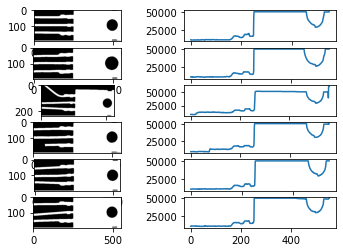

In [279]:
threshold = 25000

for i in range(6):
    print("\nImage num ", i+1)
    thresh_inv = threshds_inv[i][1]
    croped = thresh_inv[bboxes_tr[i][0]:bboxes_tr[i][2], bboxes_tr[i][1]+10:bboxes_tr[i][3]]
    plt.subplot(6,2,i*2+1),plt.imshow(croped,'gray',vmin=0,vmax=255)
    
    sumOfColumns = np.sum(croped, axis=0)
    plt.subplot(6,2,i*2+2),plt.plot(sumOfColumns)

    threshold_crossings = np.diff(sumOfColumns > threshold, prepend=False)
    legs_ind = np.where(threshold_crossings == True)
    legs_ind = legs_ind[0][0]
    legs_inds.append(legs_ind)
    
    l3 = (10 + legs_ind)*a
    L3.append(l3)
    print("L3 =", l3)
    
    l2 = L1[i] - l3
    L2.append(l2)
    print("L2 =", l2)


In [280]:
print(L2)
print(L3)

[15.642857142857142, 15.695000000000002, 15.799285714285716, 15.747142857142858, 15.225714285714288, 15.695]
[13.557142857142857, 13.661428571428571, 14.026428571428571, 13.870000000000001, 13.661428571428571, 13.765714285714285]


In [281]:
msgs = ["etalon"]
for i in range(1, 6):
    if abs(L1[0]-L1[i])<0.2 and abs(L2[0]-L2[i])<0.2 and abs(L3[0]-L3[i])<0.2 and abs(H1[0]-H1[i])<0.2 and abs(H2[0]-H2[i])<0.1 and abs(D[0]-D[i])<0.2:
        msgs.append("good")
    else:
        msgs.append("bad")
          
data = [L1, L2, L3, H1, H2, D, msgs]    
pd.DataFrame(data, index =["L1", "L2", "L3", "H1", "H2", "D", "result"], columns=["1", "2", "3", "4", "5", "6"])

,1,2,3,4,5,6
L1,29.2,29.3564,29.8257,29.6171,28.8871,29.4607
L2,15.6429,15.695,15.7993,15.7471,15.2257,15.695
L3,13.5571,13.6614,14.0264,13.87,13.6614,13.7657
H1,10.2721,10.22,12.41,10.2721,10.2721,10.22
H2,5.13607,5.03179,5.00571,5.11,5.05786,5.08393
D,3.70214,4.38,3.65,3.59786,3.65,3.59786
result,etalon,bad,bad,bad,bad,bad



Image num  1
4 Regions detected
P 1  =  2.476785714285714
P 2  =  5.214285714285714
P 3  =  7.873571428571429

Image num  2
3 Regions detected
P 1  =  2.5028571428571427
P 2  =  5.083928571428571
P 3  =  7.873571428571429

Image num  3
3 Regions detected
P 1  =  2.607142857142857
P 2  =  7.273928571428572
P 3  =  9.724642857142857

Image num  4
4 Regions detected
P 1  =  2.3725
P 2  =  5.11
P 3  =  8.03

Image num  5
3 Regions detected
P 1  =  2.607142857142857
P 2  =  5.2664285714285715
P 3  =  7.821428571428571

Image num  6
3 Regions detected
P 1  =  2.4507142857142856
P 2  =  5.501071428571429
P 3  =  7.8475


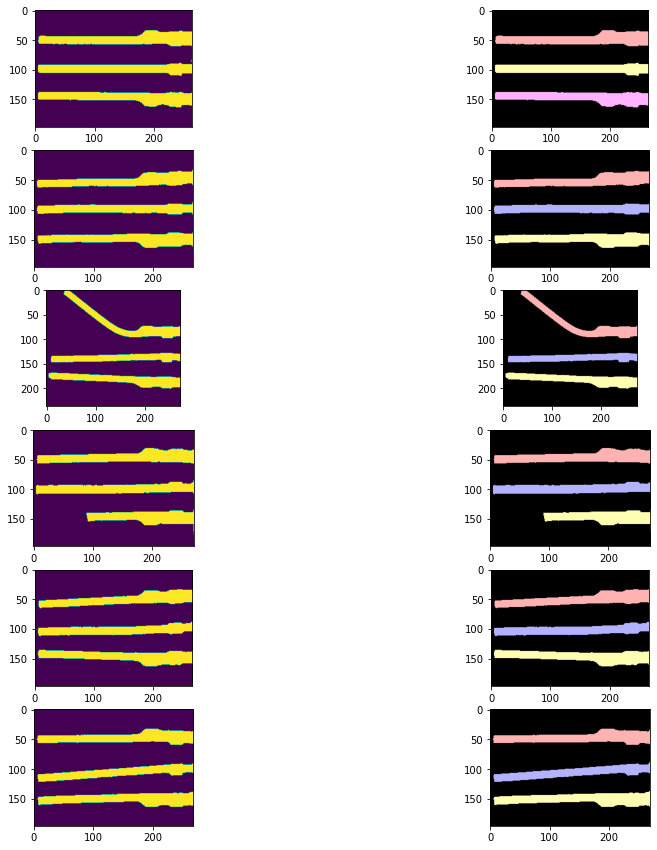

In [285]:
P = [[] for i in range(3)]

plt.figure(figsize=(15, 15)) 
for i in range(6):
    print("\nImage num ", i+1)
    thresh_inv = threshds_inv[i][1]
    croped_legs = thresh_inv[bboxes_tr[i][0]:bboxes_tr[i][2], bboxes_tr[i][1]-5:bboxes_tr[i][1]+legs_inds[i]+10]
    plt.subplot(6,2,i*2+1),plt.imshow(croped_legs,vmin=0,vmax=255)
    
    label_image = measure.label(croped_legs)
    image_label_overlay = color.label2rgb(label_image, image=croped_legs, bg_label=0)

    regions = measure.regionprops(label_image)
    plt.subplot(6,2,i*2+2),plt.imshow(image_label_overlay,vmin=0,vmax=255)
    
    print(len(regions), "Regions detected")
    
    
    j = 1
    #in some images noise is detected, so we use props.area to sort it out
    for r in regions:
        if r.area>150:
            minr_r, minc_r, maxr_r, maxc_r = r.bbox
            p = minr_r + (maxr_r - minr_r)/2
            print("P", j, " = ", p*a)
            P[j-1].append(p*a)
            j += 1
    

    
    
    

In [288]:
print(P)

[[2.476785714285714, 2.5028571428571427, 2.607142857142857, 2.3725, 2.607142857142857, 2.4507142857142856], [5.214285714285714, 5.083928571428571, 7.273928571428572, 5.11, 5.2664285714285715, 5.501071428571429], [7.873571428571429, 7.873571428571429, 9.724642857142857, 8.03, 7.821428571428571, 7.8475], [], [], []]


In [291]:
msgs = ["etalon"]

for i in range(1, 6):
    if abs(L1[0]-L1[i])<0.2 and abs(L2[0]-L2[i])<0.2 and abs(L3[0]-L3[i])<0.2 and abs(H1[0]-H1[i])<0.2 and abs(H2[0]-H2[i])<0.1 and abs(D[0]-D[i])<0.2:
        msgs.append("good")
    else:
        msgs.append("bad")
          
data = [L1, L2, L3, H1, H2, D, P[0], P[1], P[2], msgs]    
pd.DataFrame(data, index =["L1", "L2", "L3", "H1", "H2", "D", "P1", "P2", "P3", "result"], columns=["1", "2", "3", "4", "5", "6"])

,1,2,3,4,5,6
L1,29.2,29.3564,29.8257,29.6171,28.8871,29.4607
L2,15.6429,15.695,15.7993,15.7471,15.2257,15.695
L3,13.5571,13.6614,14.0264,13.87,13.6614,13.7657
H1,10.2721,10.22,12.41,10.2721,10.2721,10.22
H2,5.13607,5.03179,5.00571,5.11,5.05786,5.08393
D,3.70214,4.38,3.65,3.59786,3.65,3.59786
P1,2.47679,2.50286,2.60714,2.3725,2.60714,2.45071
P2,5.21429,5.08393,7.27393,5.11,5.26643,5.50107
P3,7.87357,7.87357,9.72464,8.03,7.82143,7.8475
result,etalon,bad,bad,bad,bad,bad
